In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [29]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [30]:
df_colesterol.drop(columns=['Id'], inplace=True)
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Grupo Sanguíneo     996 non-null    object 
 1   Fumante             997 non-null    object 
 2   Nível de Atividade  996 non-null    object 
 3   Idade               997 non-null    float64
 4   Peso                997 non-null    float64
 5   Altura              997 non-null    float64
 6   Colesterol          1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [31]:
df_colesterol.columns = [
    'grupo_sanguineo',
    'fumante',
    'nivel_atividade',
    'idade',
    'peso',
    'altura',
    'colesterol'
]
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grupo_sanguineo  996 non-null    object 
 1   fumante          997 non-null    object 
 2   nivel_atividade  996 non-null    object 
 3   idade            997 non-null    float64
 4   peso             997 non-null    float64
 5   altura           997 non-null    float64
 6   colesterol       1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [32]:
df_eda = df_colesterol.copy()
df_bucketing = df_colesterol.copy()

## EDA

In [33]:
df_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [34]:
df_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [35]:
df_eda.fumante.unique()

array(['Sim', 'Não', nan], dtype=object)

In [36]:
df_eda.nivel_atividade.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [37]:
df_eda.isna().sum()

grupo_sanguineo    4
fumante            3
nivel_atividade    4
idade              3
peso               3
altura             3
colesterol         0
dtype: int64

In [38]:
# Medidas estatísticas do DF
df_eda.describe()

,idade,peso,altura,colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [39]:
# Coletar medidas das variáveis categóricas
moda_grupo_sanguineo = df_eda.grupo_sanguineo.mode()
moda_nivel_atividade = df_eda.nivel_atividade.mode()
moda_fumante = df_eda.fumante.mode()


In [40]:
# Coletar medidas das variáveis númericas
mediana_idade = df_eda.idade.median()
mediana_peso = df_eda.peso.median()
mediana_altura = df_eda.altura.median()


In [41]:
# Inputar valores ausentes
df_eda.fillna(value={'grupo_sanguineo' : moda_grupo_sanguineo[0], 
                            'nivel_atividade' : moda_nivel_atividade[0],
                            'fumante' : moda_fumante[0],
                            'idade' : mediana_idade,
                            'peso' : mediana_peso,
                            'altura' : mediana_altura}, inplace=True)
df_eda.isna().sum()

grupo_sanguineo    0
fumante            0
nivel_atividade    0
idade              0
peso               0
altura             0
colesterol         0
dtype: int64

In [44]:
# Converter idade e altura para inteiro
df_eda.idade = df_eda.idade.astype(int)
df_eda.altura = df_eda.altura.astype(int)
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grupo_sanguineo  1000 non-null   object 
 1   fumante          1000 non-null   object 
 2   nivel_atividade  1000 non-null   object 
 3   idade            1000 non-null   int64  
 4   peso             1000 non-null   float64
 5   altura           1000 non-null   int64  
 6   colesterol       1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [45]:
df_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: ylabel='idade'>

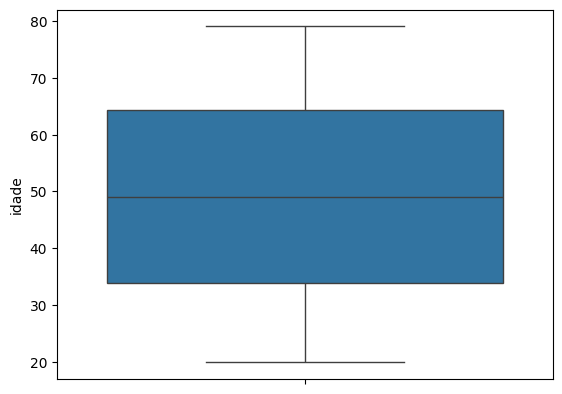

In [47]:
# Detectar outliers
sns.boxplot(data=df_eda, y='idade')

<Axes: ylabel='peso'>

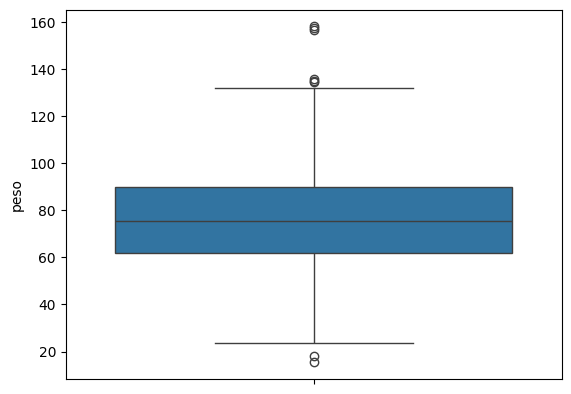

In [48]:
sns.boxplot(data=df_eda, y='peso')

In [49]:
# Filtrar o público a ser removido
df_eda[df_eda['peso'] < 40].peso.count()

np.int64(37)

In [ ]:
# Remover público do DF
df_eda.drop(df_eda[df_eda['peso'] < 40].peso.index)